***
# Health Insurance Charges Analysis

## Introduction

### This project involves analyzing a health insurance dataset using exploratory data analysis (EDA) and building predictive models to estimate insurance charges. The dataset contains information on various factors such as age, sex, body mass index (BMI), number of children, smoking status, and region. The goal is to understand the relationships between these factors and the insurance charges, and to build predictive models using linear regression and random forest algorithms.

## Dataset Description

### The dataset contains the following columns:

### age: Age of the primary beneficiary
* sex: Gender of the primary beneficiary (male/female)

* bmi: Body mass index, a measure of body fat based on height and weight

* children: Number of children covered by the insurance

* smoker: Smoking status of the primary beneficiary (yes/no)

* region: Residential area in the US (northeast, northwest, southeast, southwest)

* charges: Individual medical costs billed by health insurance


***

### Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\New folder\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Cleaning The Dataset

In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
data= data.drop_duplicates()
data.duplicated().sum()

0

In [7]:
data['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

### Exploratory Data Analysis

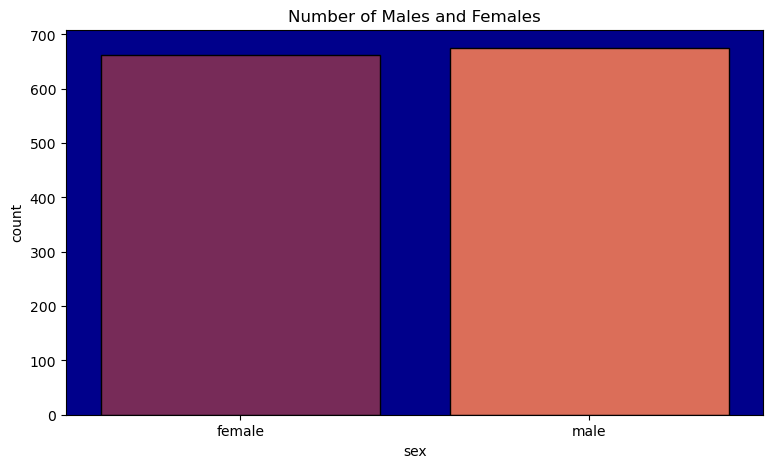

In [8]:
plt.figure(figsize=(9,5))

plot = sns.countplot(x= 'sex', data= data, palette='rocket', edgecolor= 'Black')
plot.set_facecolor('darkblue')
plt.title('Number of Males and Females')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

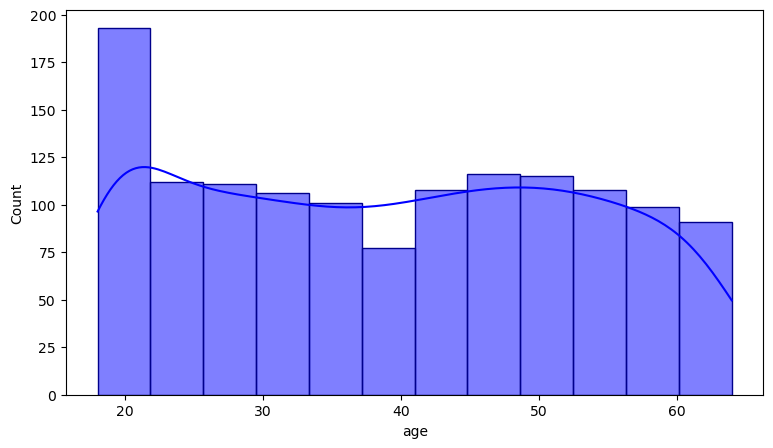

In [9]:
plt.figure(figsize=(9,5))
sns.histplot(data['age'], kde= True, edgecolor= "darkblue", color= 'blue')

In [10]:
mean_age= round(data['age'].mean())
min_age= data['age'].min()
max_age = data['age'].max()

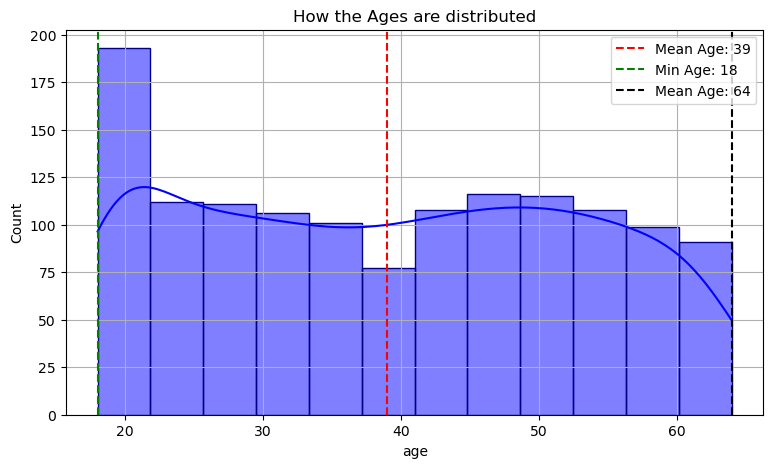

In [11]:
plt.figure(figsize=(9,5))
sns.histplot(data['age'], kde= True, edgecolor= "darkblue", color= 'blue')
plt.axvline(mean_age, color='red', linestyle= 'dashed', label= f'Mean Age: {mean_age}')
plt.axvline(min_age, color='green', linestyle= 'dashed', label= f'Min Age: {min_age}')
plt.axvline(max_age, color='black', linestyle= 'dashed', label= f'Mean Age: {max_age}')
plt.title('How the Ages are distributed')
plt.grid()
plt.legend()
plt.show()

In [12]:
mean_bmi= round(data['bmi'].mean(), 2)
min_bmi= round(data['bmi'].min(),2)
max_bmi= round(data['bmi'].max(), 2)

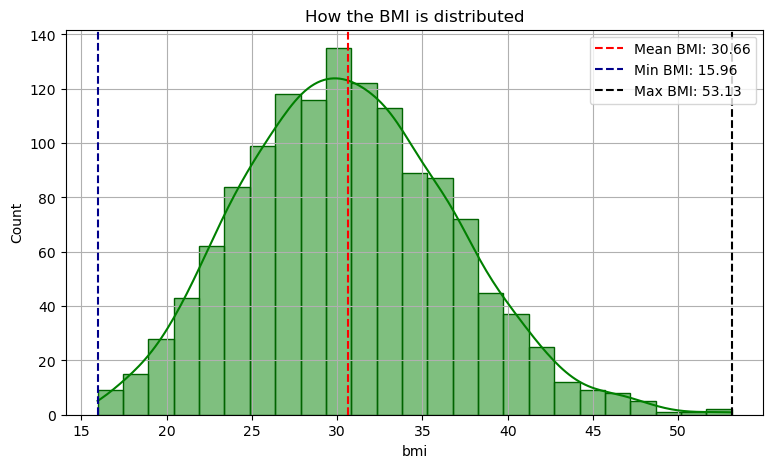

In [13]:
plt.figure(figsize=(9,5))
sns.histplot(data['bmi'], kde= True, edgecolor= "darkgreen", color= 'green')
plt.axvline(mean_bmi, color='red', linestyle= 'dashed', label= f'Mean BMI: {mean_bmi}')
plt.axvline(min_bmi, color='darkblue', linestyle= 'dashed', label= f'Min BMI: {min_bmi}')
plt.axvline(max_bmi, color='black', linestyle= 'dashed', label= f'Max BMI: {max_bmi}')
plt.title('How the BMI is distributed')
plt.grid()
plt.legend()
plt.show()

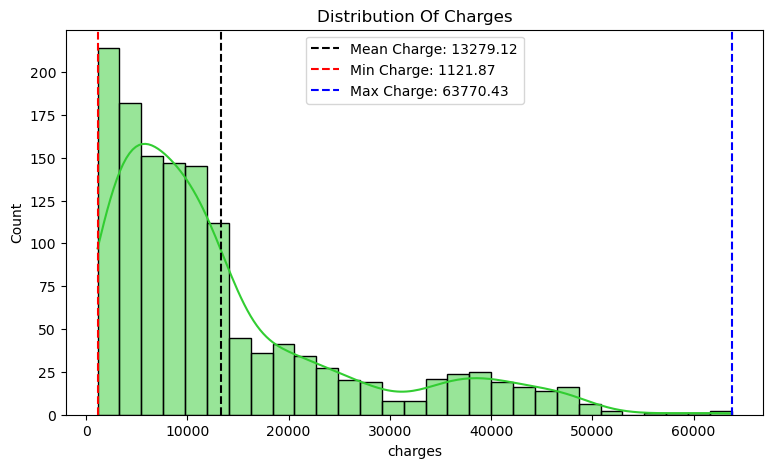

In [53]:
mean_charge = data['charges'].mean()
min_charge = data['charges'].min()
max_charge = data['charges'].max()


plt.figure(figsize= (9,5))
sns.histplot(data['charges'], kde= True, color= 'limegreen')
plt.axvline(mean_charge, color= 'black', linestyle= 'dashed', label= f'Mean Charge: {round(mean_charge, 2)}')
plt.axvline(min_charge, color= 'red', linestyle = 'dashed', label= f'Min Charge: {round(min_charge, 2)}')
plt.axvline(max_charge, color = 'blue', linestyle= 'dashed', label= f'Max Charge: {round(max_charge,2)}')
plt.title('Distribution Of Charges')
plt.legend()
plt.show()

## Handling Skewness in Charges
### The charges column was observed to be skewed. To address this, I applied a log transformation using the numpy library. This transformation helps to achieve a more normal distribution of the charges values, which can improve the performance of the predictive models.

In [54]:
data['charges']= np.log10(data['charges'])

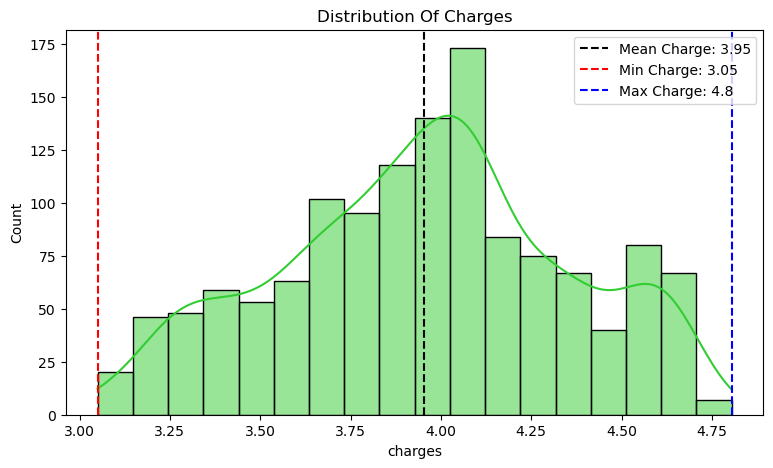

In [55]:
mean_charge = data['charges'].mean()
min_charge = data['charges'].min()
max_charge = data['charges'].max()


plt.figure(figsize= (9,5))
sns.histplot(data['charges'], kde= True, color= 'limegreen')
plt.axvline(mean_charge, color= 'black', linestyle= 'dashed', label= f'Mean Charge: {round(mean_charge, 2)}')
plt.axvline(min_charge, color= 'red', linestyle = 'dashed', label= f'Min Charge: {round(min_charge, 2)}')
plt.axvline(max_charge, color = 'blue', linestyle= 'dashed', label= f'Max Charge: {round(max_charge,2)}')
plt.title('Distribution Of Charges')
plt.legend()
plt.show()

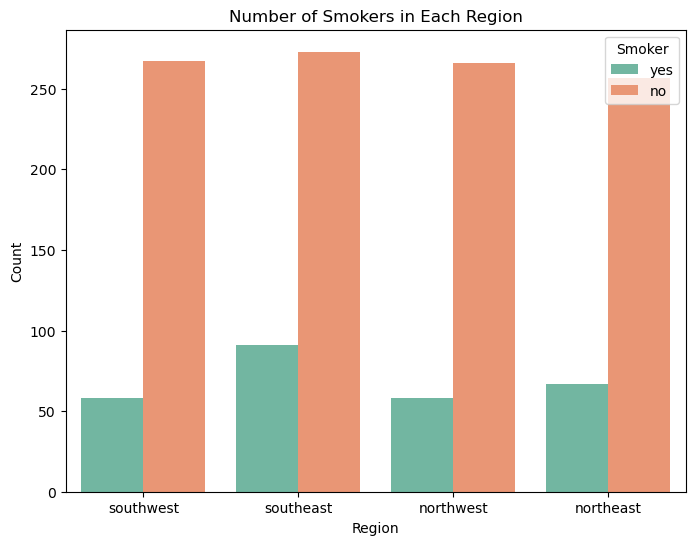

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', hue='smoker', data=data, palette='Set2')
plt.title('Number of Smokers in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

In [15]:
smoker= data[data['smoker']== 'yes']

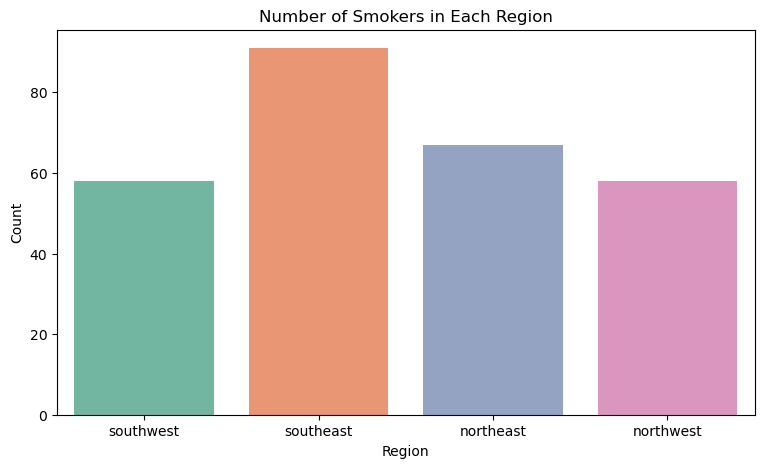

In [16]:
plt.figure(figsize=(9, 5))
sns.countplot(x='region', data=smoker, palette='Set2')
plt.title('Number of Smokers in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [56]:
data['charges'].sum()

5283.888631046094

In [57]:
charges_region= data.groupby('region')['charges'].sum()
pd.options.display.float_format = '{:.2f}'.format

In [58]:
charges_region_df= charges_region.reset_index()
charges_region_df

,region,charges
0,northeast,1290.15
1,northwest,1276.94
2,southeast,1442.10
3,southwest,1274.70


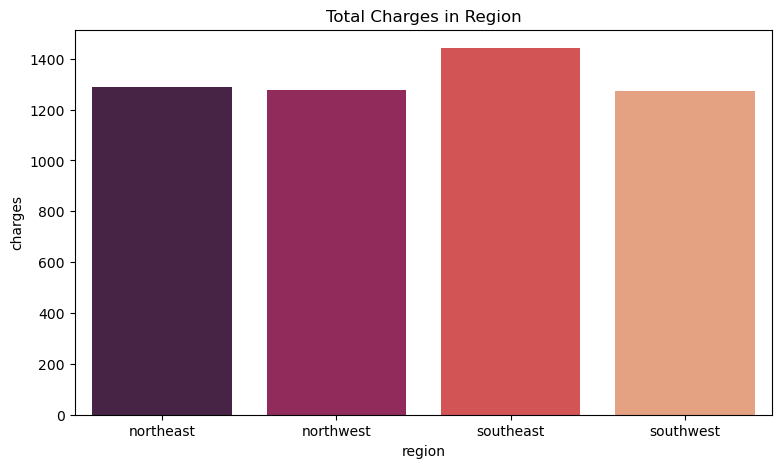

In [59]:
plt.figure(figsize=(9,5))
sns.barplot(x='region', y= 'charges', data= charges_region_df, palette='rocket')
plt.xticks(rotation= 0)
plt.title('Total Charges in Region')
plt.show()

In [60]:
data['smoker_continuous']= data['smoker'].map({'yes':1, 'no':0})
data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_continuous
0,19,female,27.90,0,yes,southwest,4.23,1
1,18,male,33.77,1,no,southeast,3.24,0
2,28,male,33.00,3,no,southeast,3.65,0
3,33,male,22.70,0,no,northwest,4.34,0
4,32,male,28.88,0,no,northwest,3.59,0


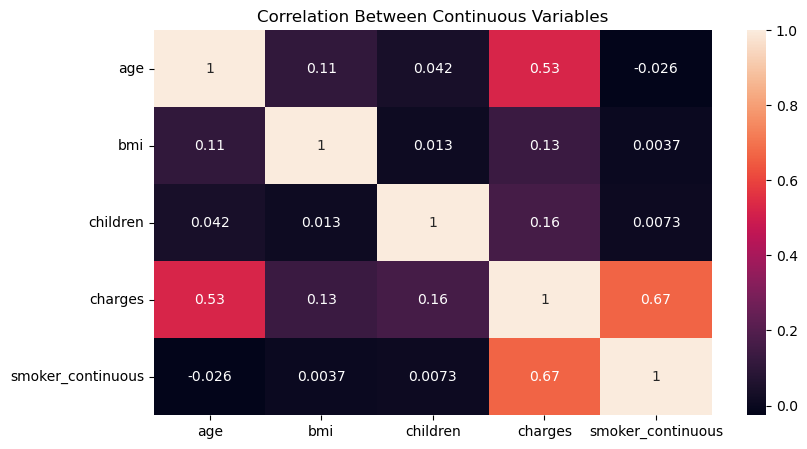

In [61]:
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(), annot= True)
plt.title('Correlation Between Continuous Variables')
plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

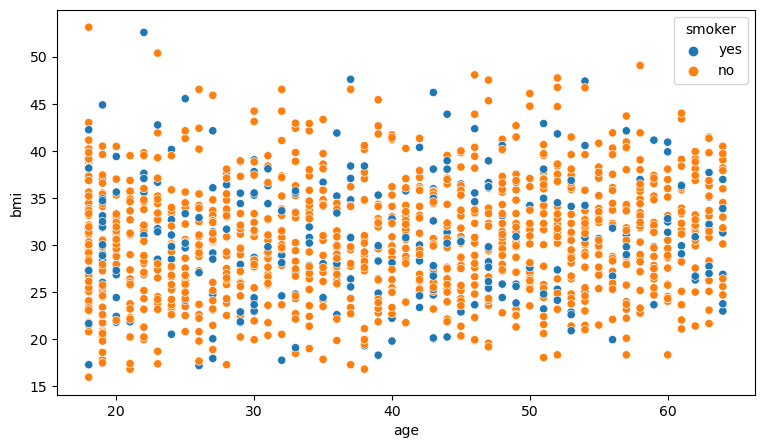

In [62]:
plt.figure(figsize=(9,5))
sns.scatterplot(x= 'age', y= 'bmi', hue= 'smoker', data= data)

<AxesSubplot:xlabel='children', ylabel='count'>

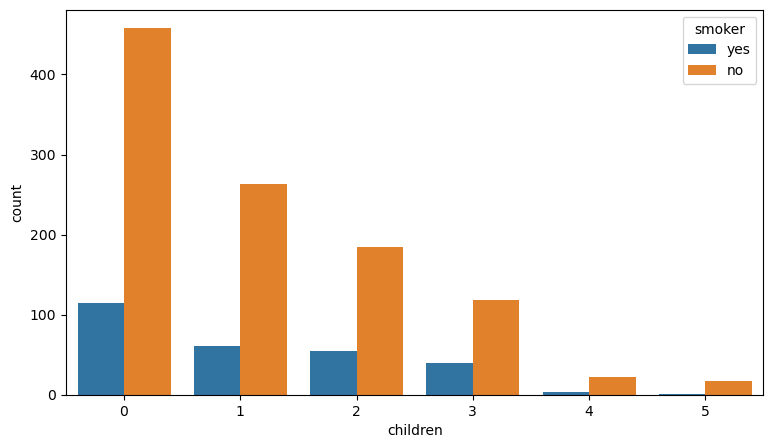

In [63]:
plt.figure(figsize=(9,5))
sns.countplot(x='children', hue= 'smoker', data= data)

In [64]:
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

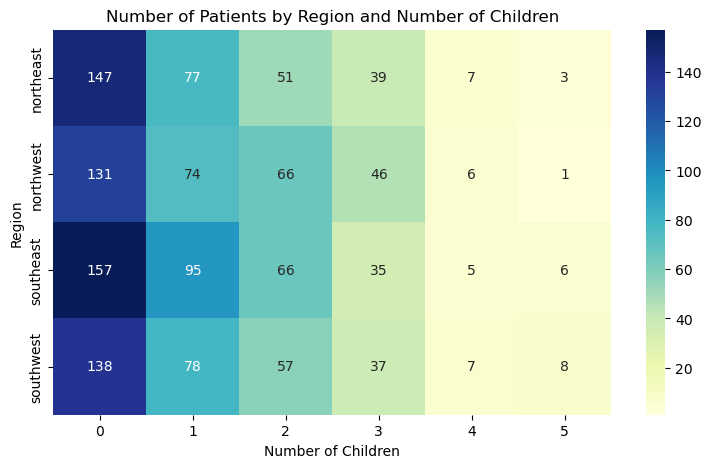

In [65]:
pivot_table = data.pivot_table(index='region', columns='children', aggfunc='size', fill_value=0)


plt.figure(figsize=(9, 5))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Number of Children')
plt.ylabel('Region')
plt.title('Number of Patients by Region and Number of Children')
plt.show()

In [66]:
smoker_data = data[data['smoker']=='yes']
non_smoker_data= data[data['smoker'] == 'no']
smoker_data_mean = round(smoker_data['charges'].mean(), 2)
non_smoker_data_mean= round(non_smoker_data['charges'].mean(), 2)

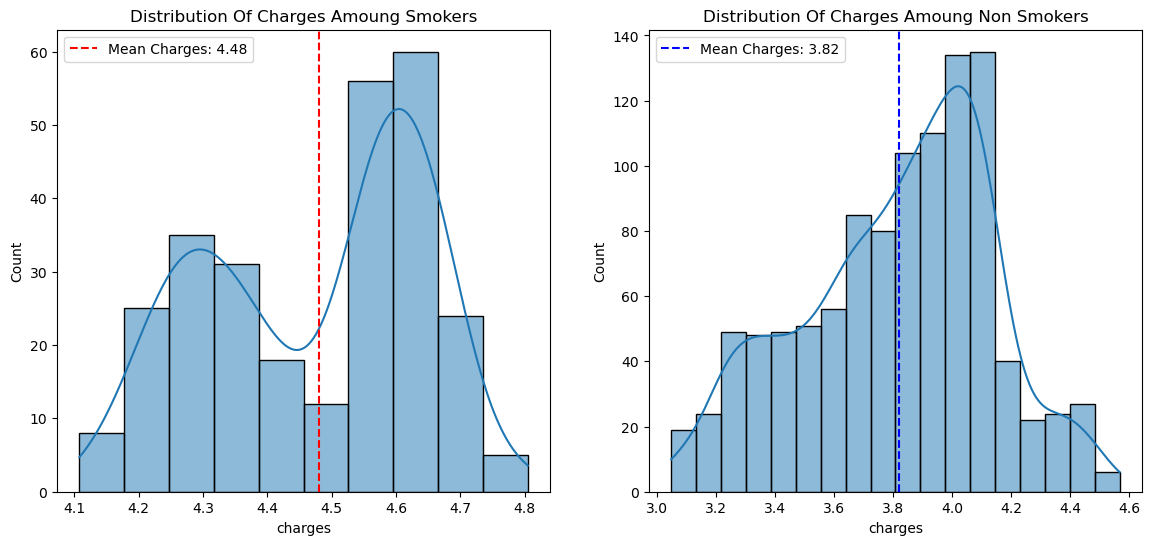

In [67]:
fig, axes= plt.subplots(1,2, figsize= (14,6))

sns.histplot(smoker_data['charges'], kde=True, ax=axes[0])
axes[0].axvline(smoker_data_mean, color= 'red', linestyle= 'dashed', label= f'Mean Charges: {smoker_data_mean}')
axes[0].set_title('Distribution Of Charges Amoung Smokers')
axes[0].legend()

sns.histplot(non_smoker_data['charges'], kde=True, ax= axes[1])
axes[1].axvline(non_smoker_data_mean, color= 'blue', linestyle= 'dashed', label= f'Mean Charges: {non_smoker_data_mean}')
axes[1].set_title('Distribution Of Charges Amoung Non Smokers')
axes[1].legend()

plt.show()
                

In [68]:
male_data= data[data['sex']== 'male']
male_data_mean = male_data['charges'].mean()
female_data = data[data['sex']== 'female']
female_data_mean = female_data['charges'].mean()

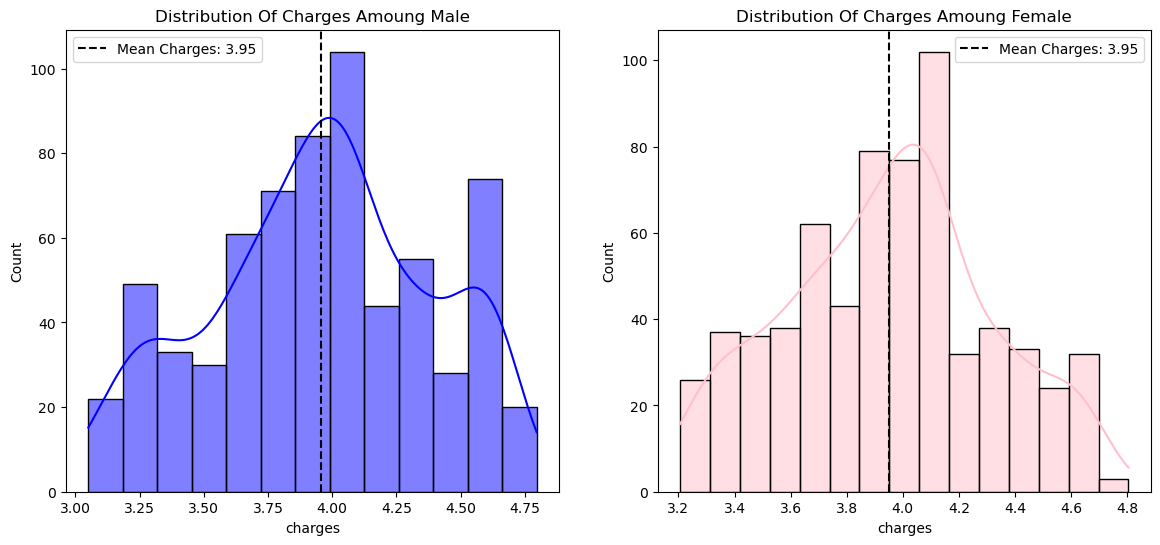

In [69]:
fig, axes = plt.subplots(1,2, figsize= (14,6))

sns.histplot(male_data['charges'], kde= True, ax= axes[0], color= 'blue')
axes[0].axvline(male_data_mean, color= 'black', linestyle = 'dashed', label = f'Mean Charges: {round(male_data_mean, 2)}')
axes[0].set_title('Distribution Of Charges Amoung Male')
axes[0].legend()

sns.histplot(female_data['charges'], kde= True, ax= axes[1], color= 'pink')
axes[1].axvline(female_data_mean, color= 'black', linestyle= 'dashed', label= f'Mean Charges: {round(female_data_mean, 2)}')
axes[1].set_title('Distribution Of Charges Amoung Female')
axes[1].legend()

plt.show()

In [70]:
data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_continuous
0,19,female,27.90,0,yes,southwest,4.23,1
1,18,male,33.77,1,no,southeast,3.24,0
2,28,male,33.00,3,no,southeast,3.65,0
3,33,male,22.70,0,no,northwest,4.34,0
4,32,male,28.88,0,no,northwest,3.59,0


In [71]:
data = data.drop(columns='smoker_continuous', axis= 1)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,4.23
1,18,male,33.77,1,no,southeast,3.24
2,28,male,33.00,3,no,southeast,3.65
3,33,male,22.70,0,no,northwest,4.34
4,32,male,28.88,0,no,northwest,3.59


## Libraries for Machine Learning

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [74]:
X = data.drop(columns='charges', axis = 1)
y = data['charges']

In [75]:
X = pd.get_dummies(X, drop_first=True)

In [76]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression Model

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
test_prediction = model.predict(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [81]:
mae_linear= mean_absolute_error(y_test, test_prediction)
mae_linear

0.1153404764993347

In [82]:
mse_linear = mean_squared_error(y_test, test_prediction)
mse_linear

0.03466638189917082

In [83]:
rmse= np.sqrt(mean_squared_error(y_test, test_prediction))
rmse

0.18618910252528428

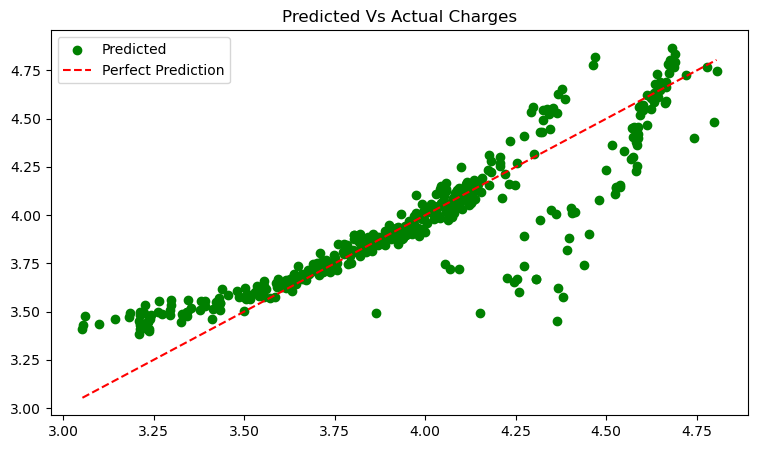

In [85]:
plt.figure(figsize= (9,5))

plt.scatter(y_test, test_prediction, color= 'green', label= 'Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color= 'red', linestyle= 'dashed', label= 'Perfect Prediction')
plt.title('Predicted Vs Actual Charges')
plt.legend()
plt.show()

## Randon Forest Model

In [87]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Mean Absolute Error: {round(mae_rf,2)}')
print(f'Mean Squared Error : {round(mse_rf,2)}')
print(f'Root Mean Squared Error: {round(rmse_rf,2)}')

Mean Absolute Error: 0.09
Mean Squared Error : 0.03
Root Mean Squared Error: 0.17


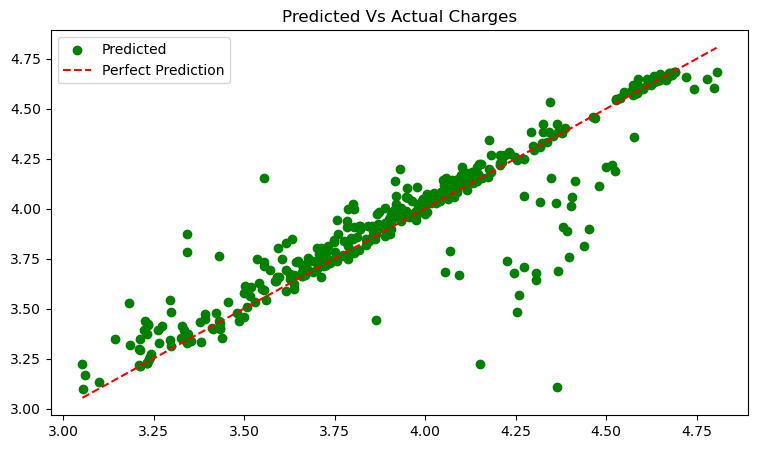

In [88]:
plt.figure(figsize= (9,5))

plt.scatter(y_test, rf_predictions, color= 'green', label= 'Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color= 'red', linestyle= 'dashed', label= 'Perfect Prediction')
plt.title('Predicted Vs Actual Charges')
plt.legend()
plt.show()

# Conclusion

### In this project, we analyzed a health insurance dataset to predict insurance charges based on various factors such as age, sex, BMI, number of children, smoking status, and region. We performed exploratory data analysis (EDA) to understand the data distribution and relationships between the variables. To address the skewness in the charges column, we applied a log transformation using the numpy library, which resulted in a more normal distribution of the charges.

### We built two predictive models: linear regression and random forest. The models were evaluated using the mean absolute error (MAE) metric. The results were as follows:

## Linear Regression Model: MAE = 0.11
## Random Forest Model: MAE = 0.09

### The random forest model outperformed the linear regression model, achieving a lower mean absolute error. This indicates that the random forest model provides more accurate predictions of insurance charges in this dataset. Additionally, the feature importance analysis from the random forest model highlighted which factors had the most significant impact on predicting insurance charges.

### In summary, through EDA and predictive modeling, we gained valuable insights into the factors affecting health insurance charges and developed effective models to predict these charges. Future work could involve exploring additional features or advanced modeling techniques to further improve prediction accuracy.

